<a href="https://www.kaggle.com/code/sitbayevalibek/telco-customer-churn?scriptVersionId=135395588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn import metrics 
import pickle

In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64


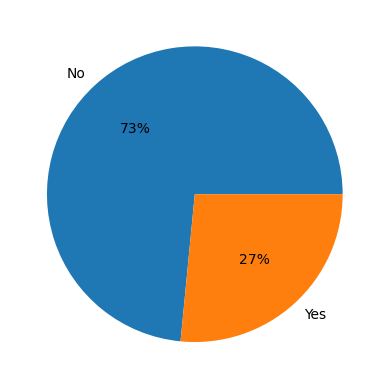

In [5]:
classCnt = df['Churn'].value_counts()
print(classCnt)

plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


If the 'TotalCharges' column contains ' ' blanks, we convert them to NaN values and pass them to 'float'.

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(method='ffill')

# Convert values from text to numbers

In [11]:
yes_no = {'Yes':1, 'No':0}
g = {'Male':1, 'Female':0}
in_s = {'No':1, 'Yes':2, 'No internet service':0}
s = {'No phone service':0, 'No':1, 'Yes':2}
net_s = {'DSL':2, 'Fiber optic':1, 'No':0}
cont = {'Month-to-month':0, 'One year':1, 'Two year':2}
paym = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
       'Credit card (automatic)':3}

In [12]:
df['gender'] = df['gender'].replace(g)

df['Partner'] = df['Partner'].replace(yes_no)
df['Dependents'] = df['Dependents'].replace(yes_no)
df['PhoneService'] = df['PhoneService'].replace(yes_no)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(yes_no)
df['Churn'] = df['Churn'].replace(yes_no)

df['MultipleLines'] = df['MultipleLines'].replace(s)

df['OnlineSecurity'] = df['OnlineSecurity'].replace(in_s)
df['OnlineBackup'] = df['OnlineBackup'].replace(in_s)
df['DeviceProtection'] = df['DeviceProtection'].replace(in_s)
df['TechSupport'] = df['TechSupport'].replace(in_s)
df['StreamingTV'] = df['StreamingTV'].replace(in_s)
df['StreamingMovies'] = df['StreamingMovies'].replace(in_s)

df['InternetService'] = df['InternetService'].replace(net_s)

df['Contract'] = df['Contract'].replace(cont)

df['PaymentMethod'] = df['PaymentMethod'].replace(paym)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,2,1,...,1,1,1,1,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,2,2,...,2,1,1,1,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,2,2,...,1,1,1,1,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,2,2,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,1,1,...,1,1,1,1,0,1,0,70.70,151.65,1


We don't need the 'customerID' column.

In [14]:
df = df.drop('customerID', axis=1)

# Correlation

In [15]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,0.010517,0.005106,0.006488,0.009451,0.000863,0.014418,0.012230,0.004720,0.009409,0.008673,0.010011,0.000126,0.011754,0.005209,0.014569,0.000608,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,0.211185,0.016567,0.008576,0.113791,0.032310,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,0.142554,0.156530,0.093704,0.220173,0.101917,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.000891,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,0.014877,0.133115,0.096848,0.319336,0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,0.159712,0.001762,0.019657,0.044590,0.029721,0.062775,0.069078,0.040788,0.086739,0.101475,0.243187,0.111377,0.123844,0.113890,0.065723,0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.030359,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.340305,0.247900,0.822745,0.352229
PhoneService,0.006488,0.008576,0.017706,0.001762,0.008448,1.000000,0.675070,0.387436,0.159989,0.129770,0.142012,0.161930,0.108239,0.114715,0.002247,0.016505,0.004070,0.247398,0.111137,0.011942
MultipleLines,0.009451,0.113791,0.117307,0.019657,0.258958,0.675070,1.000000,0.186826,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.025676,0.490700,0.410719,0.036310
InternetService,0.000863,0.032310,0.000891,0.044590,0.030359,0.387436,0.186826,1.000000,0.720587,0.650962,0.646159,0.716993,0.593193,0.597266,0.099721,0.138625,0.008124,0.323260,0.175602,0.047291
OnlineSecurity,0.014418,0.081878,0.091303,0.029721,0.232373,0.159989,0.069085,0.720587,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.036306,0.635534,0.482243,0.023309
OnlineBackup,0.012230,0.144828,0.090753,0.062775,0.253743,0.129770,0.130619,0.650962,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,0.035407,0.260715,0.003183,0.710477,0.536409,0.074205


In [16]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn               1.000000
Contract            0.396713
tenure              0.352229
PaymentMethod       0.262818
TotalCharges        0.199700
MonthlyCharges      0.193356
PaperlessBilling    0.191825
StreamingTV         0.164673
Dependents          0.164221
StreamingMovies     0.163220
SeniorCitizen       0.150889
Partner             0.150448
DeviceProtection    0.084654
OnlineBackup        0.074205
InternetService     0.047291
MultipleLines       0.036310
TechSupport         0.027037
OnlineSecurity      0.023309
PhoneService        0.011942
gender              0.008612
dtype: float64

We discard columns with low correlation.

In [17]:
kol = ['DeviceProtection',
'OnlineBackup',     
'InternetService',   
'MultipleLines',      
'TechSupport',      
'OnlineSecurity',  
'PhoneService' ,   
'gender']

df1 = df.drop(columns=kol)

# MinMaxScaler

In [18]:
mm = MinMaxScaler()

In [19]:
x = df1.drop('Churn', axis=1)
y = df1['Churn']

In [20]:
Xmm = mm.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(Xmm,y, test_size=0.2, random_state=42)

# Gradient Boosting model

In [22]:
# Create a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

Gradient Boosting Accuracy: 0.81


# Resualt

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy: 0.8069552874378992


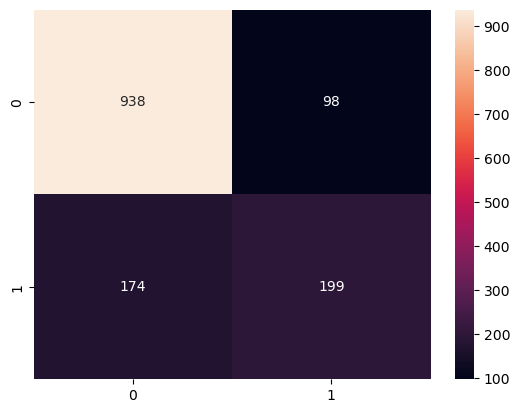

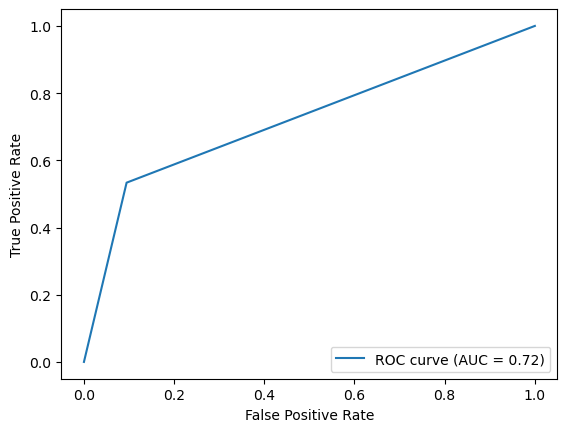

In [23]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Save model

In [24]:
file1 = 'gb_class.sav'
pickle.dump(gradient_boosting, open(file1, 'wb'))

In [25]:
import sklearn
print(sklearn.__version__)


1.2.2


# Evaluation

In [26]:
test_data = x.sample(10)
test_data

,SeniorCitizen,Partner,Dependents,tenure,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1108,0,0,0,69,0,0,2,0,3,24.60,1678.05
36,0,0,0,5,1,1,0,1,0,69.70,316.90
5583,1,1,0,26,1,2,0,0,0,84.95,2169.75
109,0,1,1,72,0,0,2,0,3,19.40,1363.25
397,0,0,0,34,1,1,0,1,3,73.95,2524.45
6201,1,0,0,5,1,1,0,0,0,80.70,374.80
2747,0,0,0,7,0,0,0,1,1,19.40,168.65
1833,0,0,0,1,1,1,0,0,0,47.95,47.95
768,0,0,0,41,1,1,0,1,0,74.25,3089.10
246,0,0,0,41,1,2,1,0,1,65.00,2531.80


In [27]:
test_label = y.loc[test_data.index]
test_label

1108    0
36      1
5583    1
109     0
397     1
6201    0
2747    0
1833    0
768     0
246     0
Name: Churn, dtype: int64

In [28]:
tdp = mm.fit_transform(test_data)

In [29]:
predicted_data = gradient_boosting.predict(tdp)

In [30]:
pd.DataFrame({'Predicted':(predicted_data).round(2), 'Real': test_label})

,Predicted,Real
1108,0,0
36,1,1
5583,1,1
109,0,0
397,0,1
6201,0,0
2747,0,0
1833,0,0
768,1,0
246,0,0


https://telco-customer-churn.streamlit.app/ <<< Using